<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Load specific forecasting tools
from statsmodels.tsa.ar_model import AR, ARResults

In [5]:
df = pd.read_csv('/content/population2.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'

In [6]:
df.head()

,POPTHM
DATE,
2011-01-01,311204.0
2011-02-01,311373.0
2011-03-01,311551.0
2011-04-01,311740.0
2011-05-01,311935.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POPTHM  96 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


## **Plot the Source data**

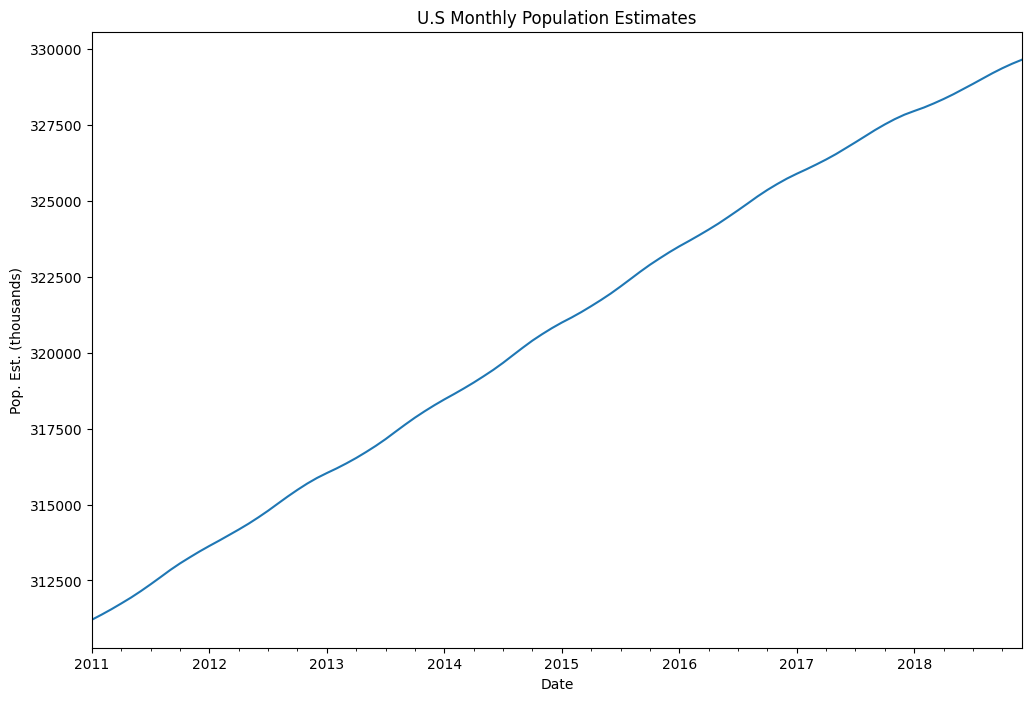

In [8]:
title = 'U.S Monthly Population Estimates'
ylabel = 'Pop. Est. (thousands)'
xlabel = 'Date'

ax = df['POPTHM'].plot(figsize=(12, 8), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [9]:
len(df)

96

In [10]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## **Fit an AR(1) Model**

In [14]:
from statsmodels.tsa.ar_model import AutoReg

In [29]:
model = AutoReg(train['POPTHM'], lags=1)
AR1fit = model.fit()
#print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n {AR1fit.params}')

Coefficients:
 const        444.798662
POPTHM.L1      0.999236
dtype: float64


<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [31]:
# General format for obtaining predictions
start = len(train)
end = len(train) + len(test) - 1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [34]:
df.tail()

,POPTHM
DATE,
2018-08-01,329040.0
2018-09-01,329216.0
2018-10-01,329379.0
2018-11-01,329527.0
2018-12-01,329659.0


In [33]:
predictions1

,AR(1) Predictions
2018-01-01,328042.159824
2018-02-01,328236.171214
2018-03-01,328430.034282
2018-04-01,328623.749143
2018-05-01,328817.315909
2018-06-01,329010.734694
2018-07-01,329204.005611
2018-08-01,329397.128773
2018-09-01,329590.104293
2018-10-01,329782.932284


In [36]:
#Comparing predictions to expected values
for i in range(len(predictions1)):
  print(f'predicted={predictions1[i]:<11.10}, expected={test["POPTHM"][i]}')

predicted=328042.1598, expected=327969.0
predicted=328236.1712, expected=328085.0
predicted=328430.0343, expected=328219.0
predicted=328623.7491, expected=328364.0
predicted=328817.3159, expected=328521.0
predicted=329010.7347, expected=328692.0
predicted=329204.0056, expected=328863.0
predicted=329397.1288, expected=329040.0
predicted=329590.1043, expected=329216.0
predicted=329782.9323, expected=329379.0
predicted=329975.6129, expected=329527.0
predicted=330168.1461, expected=329659.0


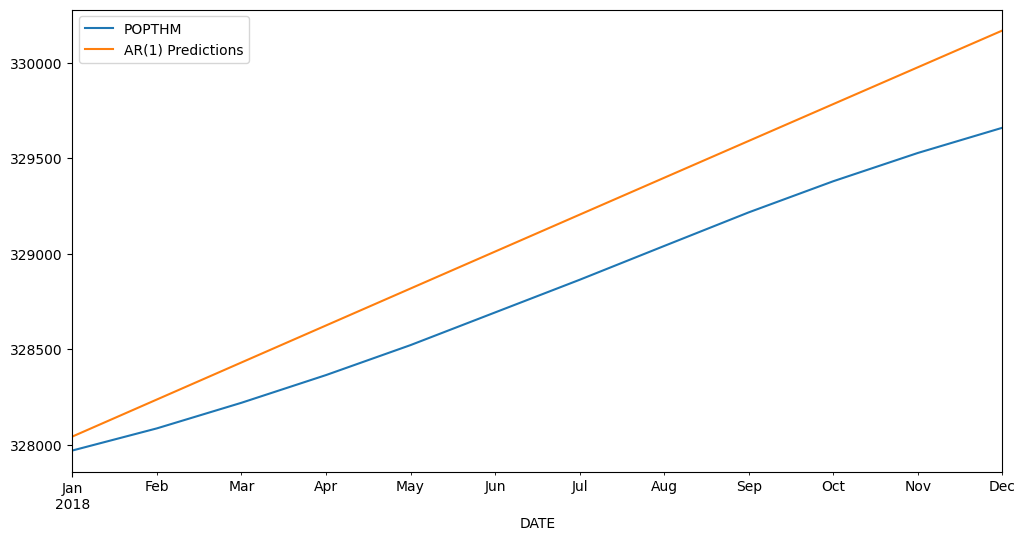

In [37]:
test['POPTHM'].plot(legend=True)
predictions1.plot(legend=True, figsize=(12, 6))
plt.show()

## **Fit an AR(2) Model**

In [47]:
model = AutoReg(train['POPTHM'], lags=2)
AR2fit = model.fit()
#print(f'Lag: {AR2fit.model.lags}')
print(f'Coefficients:\n{AR2fit.params}')

Coefficients:
const        173.416807
POPTHM.L1      1.866395
POPTHM.L2     -0.866855
dtype: float64


In [41]:
start = len(train)
end = len(train) + len(test) -1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

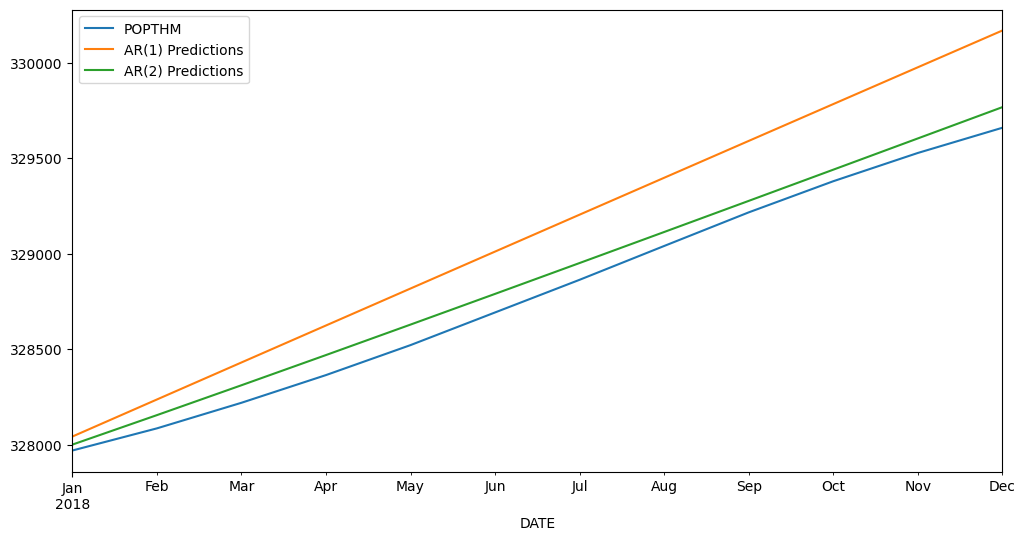

In [42]:
test['POPTHM'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True, figsize=(12, 6))
plt.show()

# **Fit an  AR(p) model where stasmodels chooses p**

In [51]:
model = AutoReg(model = AutoReg(train['POPTHM'], lags))
ARfit = model.fit()
print(f'Coefficients:\n{ARfit.params}')

NameError: name 'lags' is not defined

In [52]:
#This time we'll omit the maxlag argument in AR.fit() and let statsmodels choose a p-value for us.
model = AutoReg(train['POPTHM'], lags=12)
ARfit = model.fit()
print(f'Coefficients:\n{ARfit.params}')

Coefficients:
const         119.565570
POPTHM.L1       2.288242
POPTHM.L2      -2.066349
POPTHM.L3       1.462394
POPTHM.L4      -1.571342
POPTHM.L5       1.746714
POPTHM.L6      -1.647996
POPTHM.L7       1.482982
POPTHM.L8      -1.110558
POPTHM.L9       1.036120
POPTHM.L10     -1.341278
POPTHM.L11      1.355006
POPTHM.L12     -0.634435
dtype: float64


In [55]:
start = len(train)
end = len(train) + len(test) -1
rename = f'AR(12) Predictions'
predictions12 = ARfit.predict(start=start, end=end, dynamic=False).rename(rename)

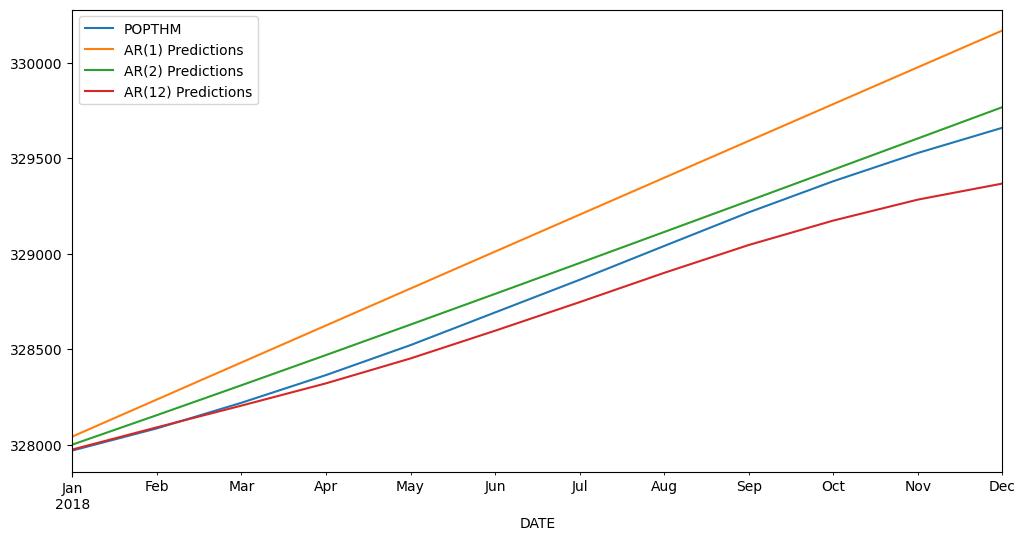

In [56]:
#Fitting an  AR(p) model where stasmodels chooses p
test['POPTHM'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions12.plot(legend=True, figsize=(12, 6))
plt.show()



## **Evaluating the model**

In [58]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)', 'AR(2)', 'AR(12)']
preds = [predictions1, predictions2, predictions12]

for i in range(3):
  error = mean_squared_error(test['POPTHM'], preds[i])
  print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 111419.1234
AR(2) Error: 6994.005041
AR(12) Error: 22197.61593


Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [59]:
modls = [AR1fit, AR2fit, ARfit]

for i in range(3):
  print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 773.97
AR(2) AIC:  654.0
AR(12) AIC:  443.4


## **Forecast**

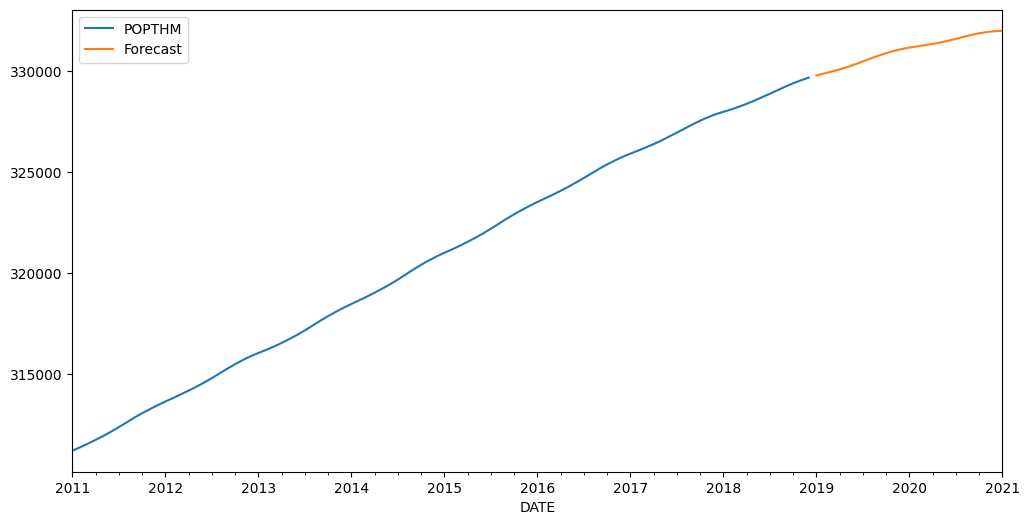

In [64]:
#First, retrain the model on the full dataste
model = AutoReg(df['POPTHM'], lags=12)

#Next, fit the model
ARfit = model.fit()

#Make predictions
fcast = ARfit.predict(start=len(df), end = len(df)+24, dynamic=False).rename('Forecast')

#Plot the results
df['POPTHM'].plot(legend=True)
fcast.plot(legend=True, figsize=(12, 6))
plt.show()